In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PART 1. DATA PREPARATION AND PREPROCESSING

## 1. Describe the dataset

In [4]:
# Load the dataset
df = pd.read_csv("data.csv")
df.head()

/var/folders/9b/m40fbxm571v1n3jg1ts0_lyh0000gn/T/ipykernel_7429/3244656738.py:2: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [4]:
# Describe the dataset
print("Description of the dataset:")
print(df.info())

Description of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB
None


In [5]:
print("Number of records in the dataset:", len(df))

Number of records in the dataset: 318477


In [66]:
# Period covered by the dataset and number of different dates
print("Period covered by the dataset:")
print("Start date:", df['Date'].min())
print("End date:", df['Date'].max())
print("Number of different dates:", df['Date'].nunique())

Period covered by the dataset:
Start date: 2018-10-01 00:00:00
End date: 2019-03-13 00:00:00
Number of different dates: 163


In [7]:
# Number of locations and location with the most job postings
print("Number of locations in the dataset:", df['Location'].nunique())
print("Location with the most job postings:", df['Location'].value_counts().idxmax())


Number of locations in the dataset: 65
Location with the most job postings: Sydney


In [8]:
# Number of job sectors and their total job postings
job_classification_counts = df['Classification'].value_counts()
num_job_classifications = len(job_classification_counts)
print("Number of job sectors in the dataset:", num_job_classifications)

Number of job sectors in the dataset: 30


In [9]:
# List the name of each sector and its total of job postings
sector_job_counts = df.groupby('Classification').size().reset_index(name='TotalJobPostings')
print(sector_job_counts)

                            Classification  TotalJobPostings
0                               Accounting              9368
1          Administration & Office Support             10020
2                Advertising, Arts & Media               833
3             Banking & Financial Services              4633
4                 CEO & General Management               844
5           Call Centre & Customer Service              3971
6         Community Services & Development              4485
7                             Construction              8372
8                    Consulting & Strategy              1206
9                    Design & Architecture              1811
10                    Education & Training              9280
11                             Engineering              6458
12         Farming, Animals & Conservation               882
13                    Government & Defence              7443
14                    Healthcare & Medical             17085
15                   Hos

In [10]:
# Filter the dataset to include only the Information & Communication Technology sector
ict_sector = df[df['Classification'] == 'Information & Communication Technology']

# Count the number of unique sub-classifications in the Information & Communication Technology sector
ict_sub_classification_counts = ict_sector['SubClassification'].value_counts()
num_ict_sub_sectors = len(ict_sub_classification_counts)
print("Number of sub-sectors in the Information & Communication Technology sector:", num_ict_sub_sectors)

Number of sub-sectors in the Information & Communication Technology sector: 22


In [11]:
# List the name of each sub-sector and its job posting number
ict_sub_classification_counts = ict_sector['SubClassification'].value_counts().reset_index()
ict_sub_classification_counts.columns = ['SubClassification', 'TotalJobPostings']
print(ict_sub_classification_counts)

                        SubClassification  TotalJobPostings
0                  Developers/Programmers              4211
1               Business/Systems Analysts              2986
2          Programme & Project Management              2413
3                              Architects              1548
4                  Engineering - Software              1437
5                  Help Desk & IT Support              1374
6       Networks & Systems Administration              1194
7                             Consultants              1149
8                                   Other               997
9             Testing & Quality Assurance               831
10                               Security               774
11                             Management               746
12                  Engineering - Network               552
13  Database Development & Administration               551
14           Web Development & Production               452
15                     Sales - Pre & Pos

In [12]:
# Salary ranges and their total job postings
salary_ranges_counts = df.groupby(['LowestSalary', 'HighestSalary']).size().reset_index(name='TotalPostings')
salary_ranges_counts

,LowestSalary,HighestSalary,TotalPostings
0,0,30,62639
1,30,40,23476
2,40,50,34436
3,50,60,27027
4,60,70,28499
5,70,80,28712
6,80,100,24249
7,100,120,27673
8,120,150,24514
9,150,200,25841


In [13]:
# Group the cleaned dataset by 'JobType' and find the minimum and maximum salaries for each job type
job_type_salary_ranges = df.groupby('JobType').agg({'LowestSalary': 'min', 'HighestSalary': 'max'})

print("Job types and their salary ranges:")
print(job_type_salary_ranges)

Job types and their salary ranges:
                 LowestSalary  HighestSalary
JobType                                     
Casual/Vacation             0            999
Contract/Temp               0            999
Full Time                   0            999
Part Time                   0            999



#### Dataset Description
<li> Overview: The dataset contains 318,477 records, each corresponding to a job posting from seek.com, collected over 163 days from October 1, 2018, to March 13, 2019. The dataset includes 13 columns representing various attributes of the job postings.
  
- **Attributes**:
  - **Id**: Unique identifier for each job posting.
  - **Title**: Job title.
  - **Company**: Name of the company offering the job.
  - **Date**: Date when the job was posted.
  - **Location**: Location of the job posting.
  - **Area**: Specific area within the location.
  - **Classification**: Main category of the job.
  - **SubClassification**: Sub-category of the job classification.
  - **Requirement**: Job requirements.
  - **FullDescription**: Full description of the job posting.
  - **LowestSalary**: Lowest salary offered for the job.
  - **HighestSalary**: Highest salary offered for the job.
  - **JobType**: Type of job (e.g., Casual/Vacation, Contract/Temp, Full Time, Part Time).

<li> Several columns have significant proportions of missing values such as Company, Location, Area, Classification, SubClassification, Requirement, FullDescription, and JobType. These missing values will be addressed in later analysis to ensure data completeness and accuracy.

<li> There are 65 unique locations in the dataset. The location with the highest number of job postings is Sydney.

<li> The dataset includes 30 different job sectors, with the Information & Communication Technology (ICT) sector having the highest number of job postings, totaling 22,796.

<li> There are 11 distinct salary ranges in the dataset.

<li> The dataset includes four different job types: Casual/Vacation, Contract/Temp, Full Time, and Part Time.

This dataset provides a comprehensive overview of job postings, allowing detailed analysis of job market trends, salary distribution and job type popularity across locations and sectors different.
 

## 2. Normalize and clean data

In [14]:
# Calculate the average salary for each job
df['AverageSalary'] = (df['LowestSalary'] + df['HighestSalary']) / 2
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


In [15]:
# Remove non-digit characters and keep only the last 8 digits
def clean_id(id_value):
    # Convert the value to a string
    id_str = str(id_value)
    cleaned_id = ''.join(filter(str.isdigit, id_str))[-8:]
    return cleaned_id

df['Id'] = df['Id'].apply(clean_id)
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


In [16]:
# Remove time information from the 'Date' column
df['Date']=df['Date'].replace(to_replace='T00:00:00.000Z', value='', regex=True)
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


In [17]:
# Convert 'Id' column to numeric
df['Id'] = pd.to_numeric(df['Id'])

# Convert 'Date' column to DateTime
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


To determine if there are any duplicate data in the dataset, first we can identify duplicate dataand then remove them.  

In [18]:
# Check for duplicates
duplicates = df.duplicated()
print("Are there any duplicate rows?")
print(duplicates.any())

Are there any duplicate rows?
True


In [19]:
# Remove duplicates, keeping the first occurrence
df_cleaned = df.drop_duplicates()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318329 entries, 0 to 318476
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Id                 318329 non-null  int64         
 1   Title              318329 non-null  object        
 2   Company            306325 non-null  object        
 3   Date               318329 non-null  datetime64[ns]
 4   Location           197081 non-null  object        
 5   Area               122577 non-null  object        
 6   Classification     197081 non-null  object        
 7   SubClassification  197081 non-null  object        
 8   Requirement        318322 non-null  object        
 9   FullDescription    302189 non-null  object        
 10  LowestSalary       318329 non-null  int64         
 11  HighestSalary      318329 non-null  int64         
 12  JobType            302266 non-null  object        
 13  AverageSalary      318329 non-null  float64      

Now, we can see there are duplicate rows in the database. Particularly, there were 318477 entries before checking for duplicates. After remove them, we got the result as above with 318329 entries. 

In [20]:
# Check for missing data
missing_data = df.isnull().sum()
print("Missing data in each column:")
print(missing_data)

Missing data in each column:
Id                        0
Title                     0
Company               12004
Date                      0
Location             121248
Area                 195819
Classification       121248
SubClassification    121248
Requirement               7
FullDescription       16175
LowestSalary              0
HighestSalary             0
JobType               16098
AverageSalary             0
dtype: int64


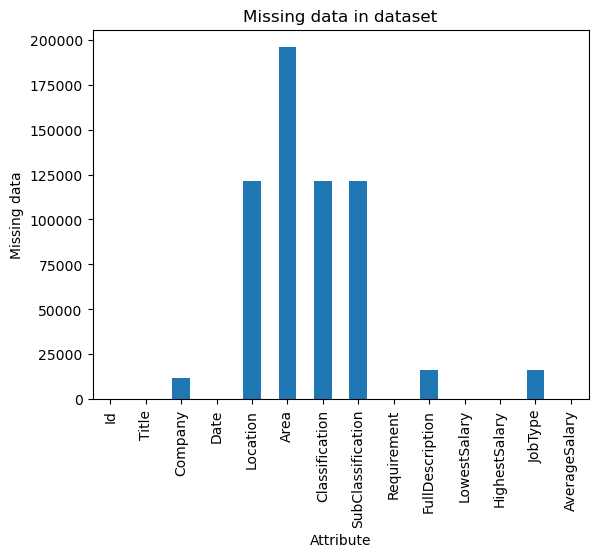

In [21]:
# Visualize missing data
missing_data.plot(kind='bar')
plt.title('Missing data in dataset')
plt.ylabel('Missing data')
plt.xlabel('Attribute')
plt.show()


#### Normalize and clean data
<li> Overview: The dataset initially contained a very small number of duplicate records (148 out of 318,477), indicating good initial data quality in terms of unique entries.
    
<li> There are significant missing values ​​in several key columns:   
    
- **Location, Classification, Sub-Classification**: Each hads more than 121,000 missing entries, accounting for more than a third of the total data.
  
- **Region**: Nearly two-thirds of the entries are missing, which may affect geographic analysis.
  
- **Company, Full Description, Job Type**: These columns have fewer missing values.
  
- **Requirements**: Only missing 7 items, not significant
 

# PART 2. DATA UNDERSTANDING

In [22]:
#Group by average salary and count the numbers
averageSalaryDf = df.groupby('AverageSalary').count()
averageSalaryDf['AverageSalary'] = (averageSalaryDf.index*1000).astype(float).map('{:,.0f}'.format)
averageSalaryDf['Total jobs'] = averageSalaryDf["Id"]
averageSalaryDf

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Total jobs
AverageSalary,,,,,,,,,,,,,,,
15.0,62639,62639,59611,62639,38541,24399,38541,38541,62637,56065,62639,62639,56080,"15,000",62639
35.0,23476,23476,22296,23476,16396,9811,16396,16396,23476,22092,23476,23476,22094,"35,000",23476
45.0,34436,34436,32076,34436,21736,13264,21736,21736,34435,33580,34436,34436,33585,"45,000",34436
55.0,27027,27027,25679,27027,16561,10755,16561,16561,27026,26206,27027,27027,26222,"55,000",27027
65.0,28499,28499,27290,28499,18121,11393,18121,18121,28499,27544,28499,28499,27566,"65,000",28499
75.0,28712,28712,27794,28712,17053,10456,17053,17053,28712,27670,28712,28712,27674,"75,000",28712
90.0,24249,24249,23625,24249,12701,7562,12701,12701,24248,23587,24249,24249,23590,"90,000",24249
110.0,27673,27673,27150,27673,17137,10575,17137,17137,27671,26682,27673,27673,26683,"110,000",27673
135.0,24514,24514,24165,24514,14701,9481,14701,14701,24514,23610,24514,24514,23612,"135,000",24514


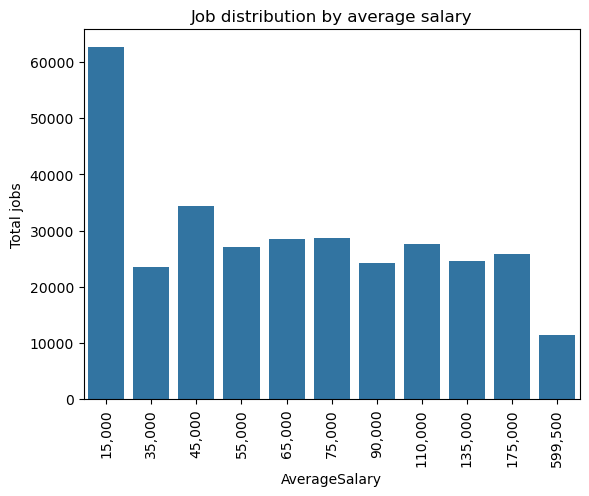

In [23]:
# Plot
sns.barplot(data= averageSalaryDf, x="AverageSalary", y="Total jobs")
plt.title("Job distribution by average salary")
plt.xticks(rotation= 90)
plt.show()

<h4>Understanding</h4>

<li>The dataset contains jobs distributed across a wide range of average salaries, from \$15,000 to \$599,500.  Each salary level has a significant number of job postings, indicating diverse job opportunities across different salary levels.
    
<li>The highest concentration of job postings is at the lower salary range, specifically at the \$15,000 level, of which there are 62,639 job postings. This suggests there are a large number of entry-level or lower-paying jobs on the market. Overall, there are a significant number of jobs with average salaries (\$35,000 to \$75,000). Although the number of high-paying jobs is lower, there are still many opportunities with higher salaries, which may be attractive to those with experience or those in specialized fields. Therefore, the data can be especially helpful if job seekers are targeting specific salary ranges.

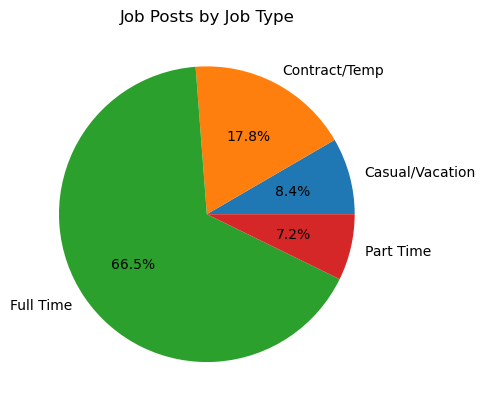

In [24]:
# Display the list of job types and the number of jobs of each type using pie chart
jobTypeDf= df.groupby("JobType").count()
jobTypeDf["Total jobs"]= jobTypeDf["Id"]
jobTypeDf["JobType"]= jobTypeDf.index

plt.title("Job Posts by Job Type")
plt.pie(jobTypeDf["Total jobs"],
        labels= jobTypeDf["JobType"], 
        autopct= "%.1f%%")
plt.show()

<h4>Understanding</h4>

- **Full-Time Positions**: The majority of job postings (66.5%) are for full-time roles, indicating a high demand for long-term employees.

- **Contract/Temporary Jobs**: These make up 17.8% of postings, suggesting a need for project-based or seasonal workers.

- **Casual/Vacation Jobs**: Representing 8.4% of postings, these roles are suitable for those seeking short-term, flexible work.

- **Part-Time Positions**: Accounting for 7.2% of postings, indicating a smaller demand compared to full-time and contract roles.

These insights help job seekers understand the job market landscape and assist employers in aligning their hiring strategies with market demands.

Text(0.5, 0, 'Number of Jobs')

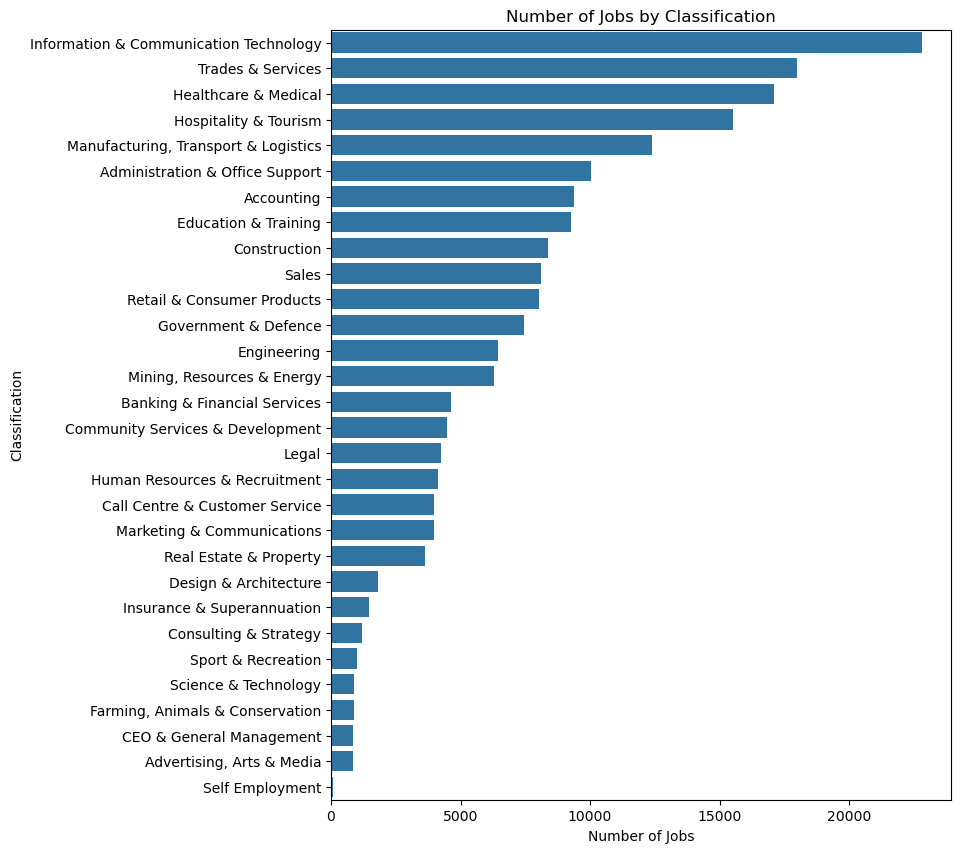

In [25]:
# Display the list of job sectors and the number of jobs of each type using horizontal bar chart
plt.figure(figsize=(8,10))
axi = sns.countplot(y='Classification',data=df,order=df.Classification.value_counts().index)
plt.title('Number of Jobs by Classification')
plt.xlabel('Number of Jobs')

<h4>Understanding</h4>

The dataset provides detailed information about different job sectors and the corresponding total number of job postings. However, there are 4 job sectors with the most job positions.

- **Information and Communications Technology (ICT)**: The ICT sector emerged as one of the most prominent sectors in terms of job availability, highlighting demand about technology experts.

- **Trade & Services**: this sector ranks 2nd, showing a steady demand for skilled tradesmen and service workers.

- **Healthcare & Medical**: This field has a significant presence in the job market, reflecting the demand for healthcare professionals.

- **Hospitality & Tourism**: Behind healthcare, this sector also represents a thriving industry with many opportunities in the tourism and hospitality services sector.

These insights can help job seekers identify areas with higher employability and guide employers in understanding the competitive landscape in different industries.

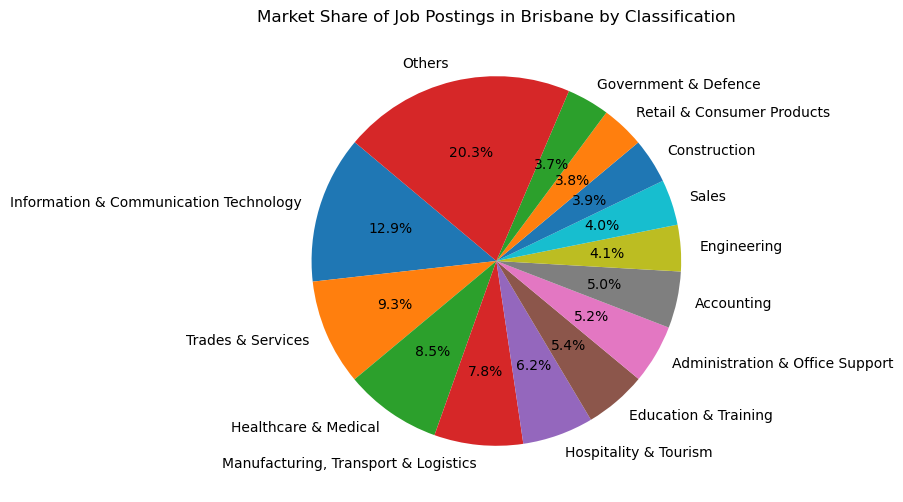

In [68]:
# Choose favorite location. Visualize the market share of that location in pie chart.

favorite_location = 'Brisbane'
brisbane_df = df[df['Location'] == favorite_location]
classification_counts = brisbane_df['Classification'].value_counts()


threshold = 0.03  

# Group classifications with small percentages into "Others"
total_jobs = classification_counts.sum()
classification_counts['Others'] = classification_counts[classification_counts / total_jobs < threshold].sum()
classification_counts = classification_counts[classification_counts / total_jobs >= threshold]


labels = classification_counts.index
sizes = classification_counts.values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Market Share of Job Postings in Brisbane by Classification')
plt.show()

<h4>Understanding</h4>

After analyzing the employment market share in Brisbane across a variety of sectors, it is clear that different industries play a diverse role in shaping employment opportunities. Among the top five classifications are Information & Communications Technology (ICT), Commerce & Services, Healthcare & Medicine, Manufacturing, Transportation & Logistics, and Hospitality & Tourism. Specially,

- **ICT**: With a 12.9% market share, the ICT sector reflects Brisbane's growing technology scene and growing demand for IT professionals.
  
- **Trade & Services**: With a market share of 9.3%, this sector highlights the consistent need for skilled workers in Brisbane.
  
- **Healthcare & Medical**: Dominant with an 8.5% market share, this sector highlights the significant demand for healthcare professionals in Brisbane.
  
- **Manufacturing, Transport & Logistics**: 7.8% market share, demonstrating the need for professionals involved in manufacturing, transport and logistics, demonstrating the role of Brisbane as an industrial center.
  
- **Hotels & Tourism**: Despite its importance, hotels and tourism contribute 6.2% of the market share, reflecting Brisbane's vibrant tourism industry.

These findings provide valuable insights for job seekers and employers alike, highlighting the distribution of employment opportunities across different sectors in Brisbane's job market.

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

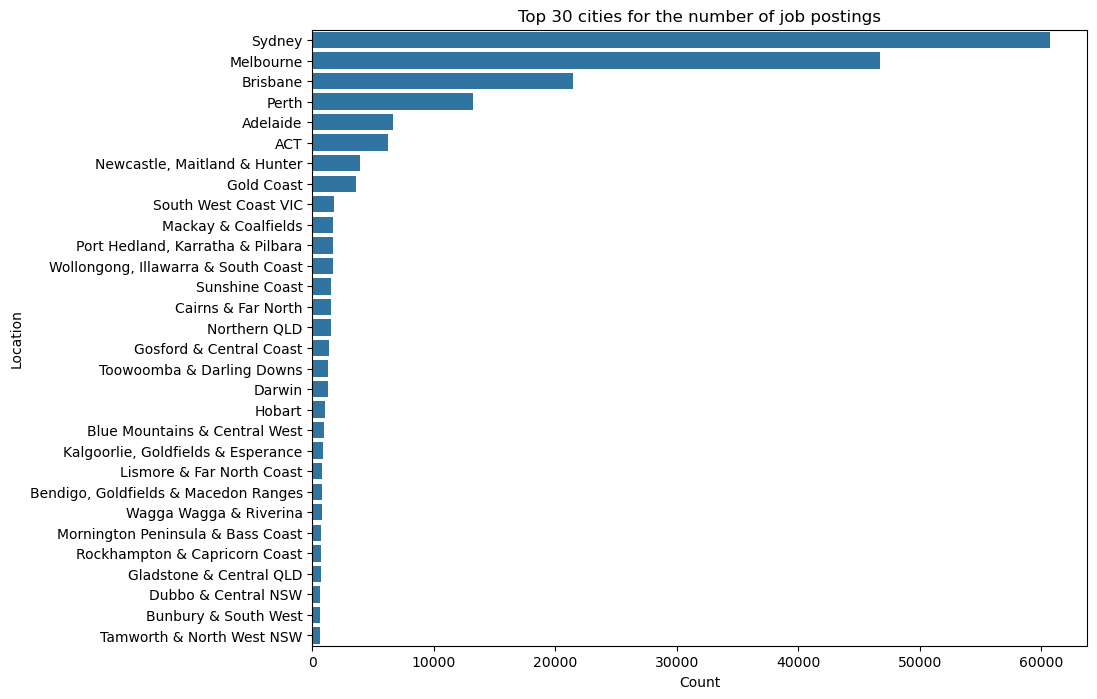

In [49]:
# Top 30 cities for the number of job postings
location = df[df['Location'].isna()==False]
location_counts = location.groupby('Location').count()
location_counts['Location'] = location_counts.index
location_counts['Count'] = location_counts["Id"]
location_counts.sort_values("Count", ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
sns.barplot(
    data=location_counts,
    y="Location",
    x="Count",
    order=location_counts["Location"][:30])
plt.title("Top 30 cities for the number of job postings")
plt


/var/folders/9b/m40fbxm571v1n3jg1ts0_lyh0000gn/T/ipykernel_65009/4007468487.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

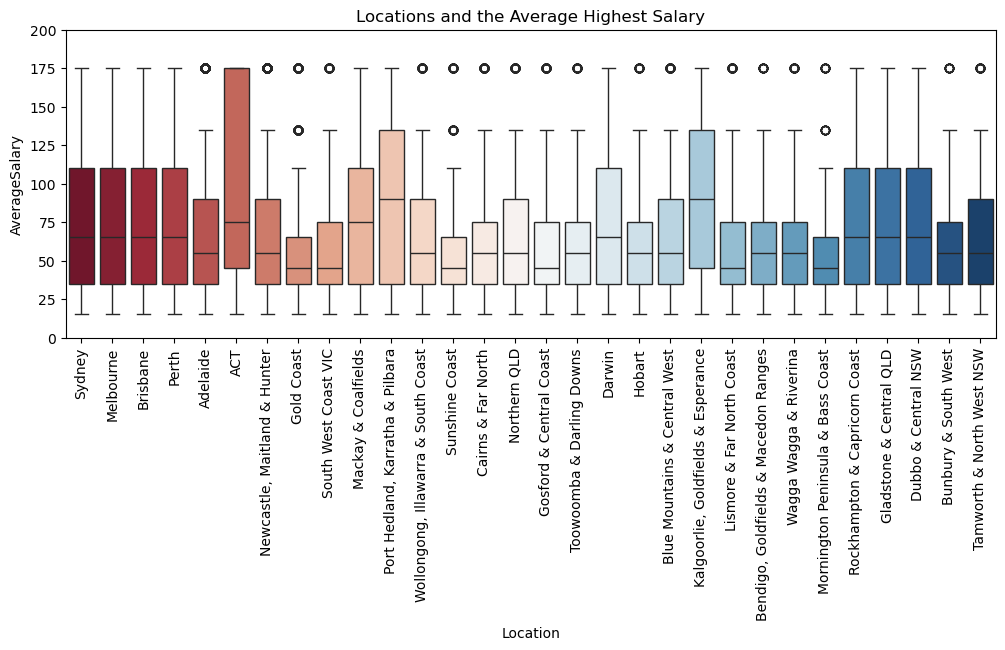

In [65]:
# Visualize salary distribution for each city using boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(
    data=location,
    x="Location",
    y="AverageSalary",
    order=location_counts["Location"][:30],
    palette=sns.color_palette("RdBu", n_colors=30))

plt.title('Locations and the Average Highest Salary')
plt.xticks(rotation=90)
plt.ylim(0, 200)
plt

<h4>Understanding</h4>
The above results provide a comprehensive view of salary distribution across different cities, highlighting insights into the job market. Here is a summary of the findings:

- **Sydney, Melbourne, Brisbane and Perth**: These major cities, which are also the top four for job postings, have similar salary distributions, suggesting a relatively balanced employment landscape in terms of salary.

- **Adelaide**: Although it is in the top 5 cities with the most job postings, Adelaide has a slightly lower salary distribution than other major cities.

- **ACT**: Salaries in ACT appear to be higher, with the third quartile reaching the maximum, suggesting a potentially lucrative jobs market in the region.

- **Port Hedland, Karratha and Pilbara, Kalgoorlie, Goldfields and Esperance**: These locations demonstrate a higher salary distribution than other locations, in line with their predominantly Mining sectors , Resources & Energy. This shows that this field can offer higher paying opportunities.

- **Gold Coast and Sunshine Coast**: There is a lower wage distribution in these locations, suggesting a less lucrative job market.

It can be concluded that these observations provide valuable insight into differences in wage distribution across different cities, providing insight into trends and opportunities in the job market.


# PART 3. DATA ANALYSIS AND VISUALISATION

## 1. Analyse by comparison

In [ ]:
#your code here

## 2. Analyse by time

In [ ]:
#your code here

## 3. Forecasting and skill extractions

In [ ]:
#your code here

# PART 4. DISCUSSION

## Scenario 1

To guide Tom towards a suitable university major using the current job market dataset, the process involves several steps aimed at identifying job classifications associated with high-income positions, particularly those offering 80K or more. Firstly, locations corresponding to Queensland are defined. Secondly, jobs located in Queensland are filtered. Following this, the focus shifts to filtering jobs in these locations with an average salary equal to or greater than 80K. Finally, the analysis delves into determining the most prevalent job classifications and Sub-classifications among these high-income roles. Based on this analysis, recommendations are made for majors that closely align with these results. 

In [93]:
# Define locations corresponding to Queensland
queensland_locations = [
    'Brisbane', 'Gold Coast', 'Northern QLD', 'Sunshine Coast',
    'Toowoomba & Darling Downs', 'Mackay & Coalfields',
    'Rockhampton & Capricorn Coast', 'Gladstone & Central QLD', 'Cairns & Far North'
]

# Filter for jobs located in Queensland
queensland_jobs = df[df['Location'].isin(queensland_locations)]

# Filter for jobs with an average salary >= 80K
high_income_jobs = queensland_jobs[queensland_jobs['AverageSalary'] >= 80]

top_classifications = high_income_jobs['Classification'].value_counts().head(5)
top_classifications


Classification
Information & Communication Technology    2106
Healthcare & Medical                      1492
Mining, Resources & Energy                1107
Engineering                                792
Government & Defence                       703
Name: count, dtype: int64

In [94]:
top_subclassification = high_income_jobs['SubClassification'].value_counts().head(5)
top_subclassification

SubClassification
Other                                 636
Management                            533
Government - State                    499
Mining - Engineering & Maintenance    388
Developers/Programmers                341
Name: count, dtype: int64

With Information & Communication Technology (ICT) ranking as the top classification, pursuing a major in Information Technology offers promising career prospects. Roles such as Developers/Programmers are highly sought after, indicating abundant opportunities for growth and advancement. Additionally, Healthcare & Medical emerges as the second-highest classification so Tom may consider pursuing a major in Healthcare, which can provide financial opportunities. Another recommendation for Tom is from in theMining, Resources & Energy sector with Mining - Engineering & Maintenance major, which prominently features among the top sub-classifications, offering well-paid roles in this industry. It shares similarities with the Engineering sector, providing Tom with diverse career pathways. Furthermore, sub-classifications such as Government - State present opportunities in public administration roles within the Government & Defence sector. Pursuing a major in Government and Public Administration can equip Tom for roles in government agencies or related organizations. By considering these recommendations, Tom can align his university major with prevailing job market trends, enhancing his prospects of securing high-income opportunities in his chosen field upon graduation.

## Scenario 2

To attract more students and improve the employability of graduates, Griffith University should adjust its enrollment strategy based on current job market data. In particular, based on number of jobs posting by classification from part 2 and the results from scenario 1, there are a number of recommendations for Griffith University. 

Regarding majors that need to be expanded, the first industry that needs to be considered is Information and Communications Technology (ICT). That is because the IT field is one of the top classifications for high-paying jobs in Queensland and has the highest number of job postings in general (22,796). In addition, based on the results of part 1, sub-sector and its job posting number, Griffith University should expand enrollment into IT-related majors, including Developers/Programmers, Business/Systems Analysts, Programme & Project Management, Architects, Engineering - Software, Help Desk & IT Support etc. as they are particularly in demand, suggesting strong job prospects for IT graduates.

Health Care & Medicine also ranked in the top 3 in terms of number of job postings (17,085). This sector is also the second highest earning employment classification in Queensland. There is a growing demand for skilled healthcare professionals because of an aging population, growing healthcare needs, and advances in medical technology. A career in this industry is especially promising. For this reason, the university should increase enrollment in Healthcare majors such as Nursing, Medicine, Health Management, etc. in order to meet industry demands.

Engineering has a significant number of job postings (6,458) and is critical for infrastructure development, technological innovation, and resource management. Notably, the Mining - Engineering & Maintenance sub-classification stands out as a key sector for high-income positions in Queensland. It can be seen that engineering graduates have diverse career opportunities across various industries, such as construction, energy, and manufacturing. Consequently, Griffith University should expand admissions in Engineering majors to align with the strong demand for technical expertise in these fields.

In terms of majors to reduce, majors related to Self Employment sector should be reduced. It is because self employment has the lowest number of job postings (93), indicating minimal direct job opportunities in this area. Moreover, majors in the Advertising, Arts & Media industries should be considered for reduction. It is because Advertising, Arts & Media has a relatively low number of job postings (833). This shows that job opportunities are limited compared to other industries. Instead, integrate these majors with technology and business programs to enhance employability. Furthermore, despite its importance, Science & Technology has only 905 job postings. This might reflect a narrower job market compared to other fields such as ICT or Healthcare. Therefore, Griffith University should reduce independent Science programs. It can be consider to emphasize interdisciplinary programs that combine Science & Technology with applied fields such as Biotechnology, and Health Sciences to increase relevance and job prospects.

